# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Checking for missing values
data.fillna(data.mean(), inplace=True)

# Filling missing values with column means
data.fillna(data.mean(), inplace=True)

Plot the Data Appropriately

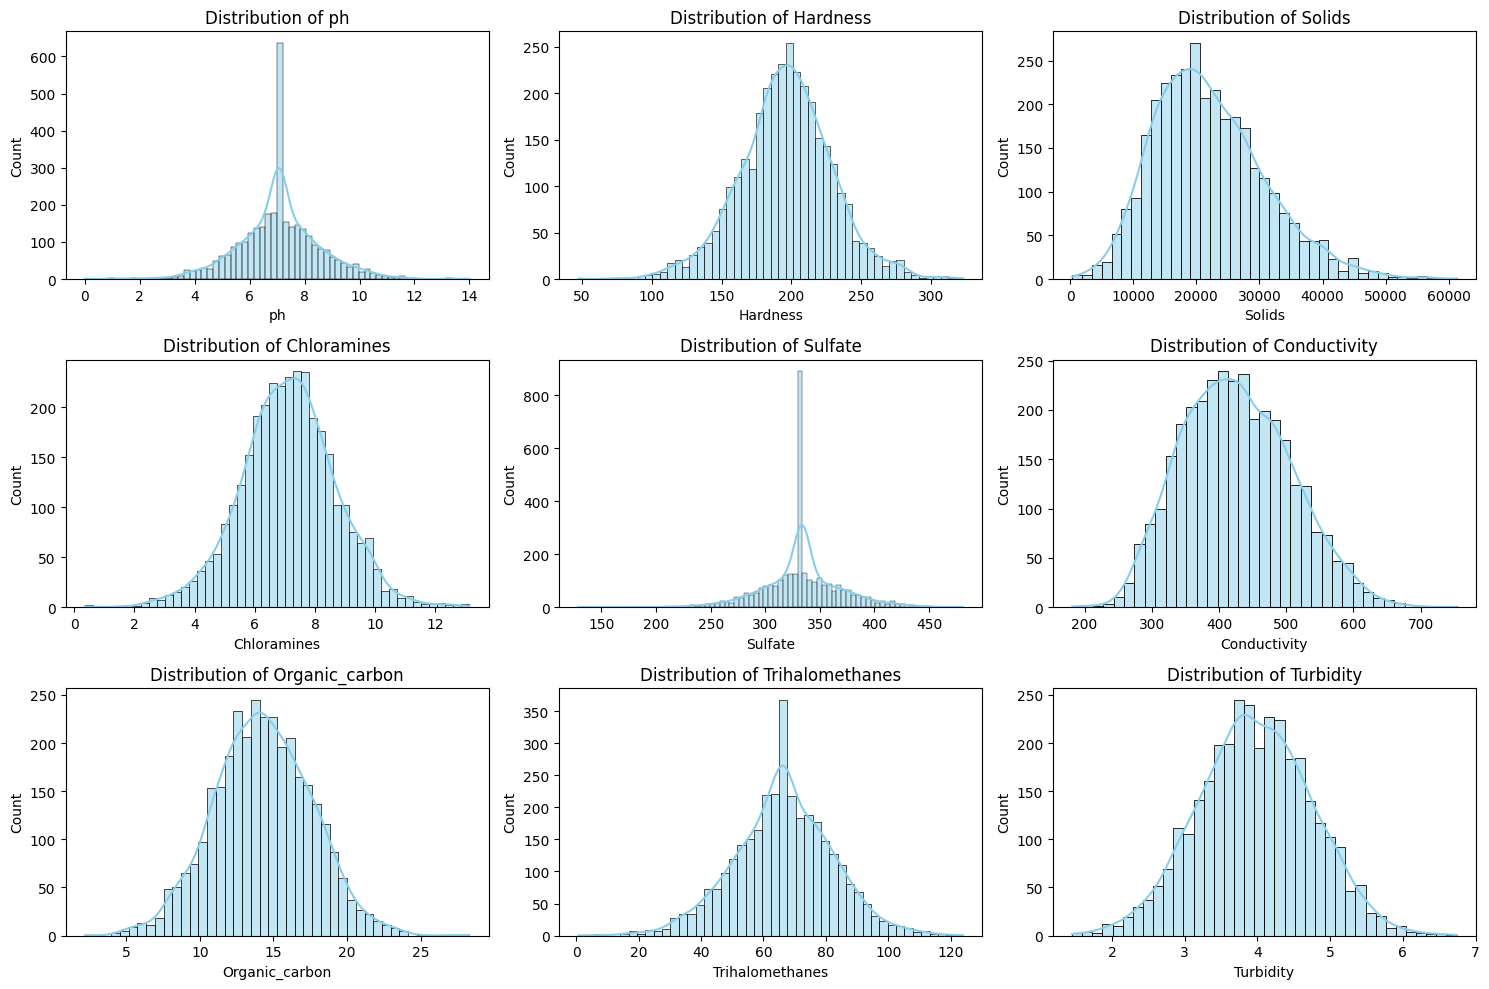

In [6]:
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [7]:
# Distribution of the target classes ('Potability')

class_counts = data['Potability'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


<ipython-input-8-2a47f609188a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Potability', palette='Set2')


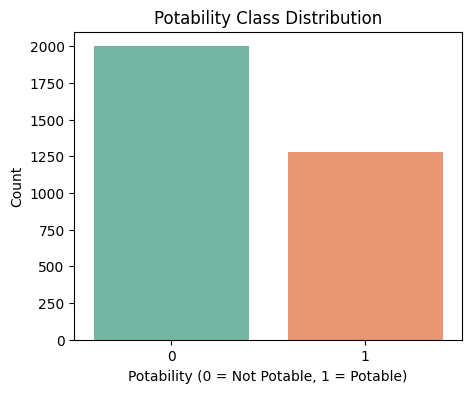

In [8]:
# Count plot for target label (Potability)
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Potability', palette='Set2')
plt.title("Potability Class Distribution")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

In [9]:
# Splitting the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, validation, and test sets (70/15/15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)  # 0.1765 ≈ 15/(85)

# Show sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2292
Validation set size: 492
Test set size: 492


# Each Memeber Defines their model Here

In [10]:
#Model Definition by member 2
def model_nicolle(X_train):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.optimizers import RMSprop
    import tensorflow as tf

    # Build model
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.35),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.35),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Define optimizer
    optimizer = RMSprop(learning_rate=0.0005)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    # Early stopping
    early_stop = EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        min_delta=0.01,
        restore_best_weights=True
    )

    return model, early_stop

In [11]:
# Model training
model, early_stop = model_nicolle(X_train)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5489 - loss: 0.7556 - precision: 0.3391 - recall: 0.1619 - val_accuracy: 0.6220 - val_loss: 0.7264 - val_precision: 0.7143 - val_recall: 0.0521
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.7351 - precision: 0.3778 - recall: 0.1420 - val_accuracy: 0.6159 - val_loss: 0.7200 - val_precision: 0.8000 - val_recall: 0.0208
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5945 - loss: 0.7183 - precision: 0.4111 - recall: 0.1102 - val_accuracy: 0.6159 - val_loss: 0.7129 - val_precision: 0.8000 - val_recall: 0.0208
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6043 - loss: 0.7189 - precision: 0.5193 - recall: 0.1400 - val_accuracy: 0.6159 - val_loss: 0.7071 - val_precision: 0.8000 - val_recall: 0.0208
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 0.7004 - precision: 0.5242 - recall: 0.1001 - val_accuracy: 0.6199 - val_loss: 0.7013 - val_preci

In [12]:
# Evaluation
train_loss, train_acc, train_prec, train_rec = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=0)

print(f"Train - Acc: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}")
print(f"Test  - Acc: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}")

Train - Acc: 0.663, Precision: 0.707, Recall: 0.233
Test  - Acc: 0.663, Precision: 0.724, Recall: 0.219


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion matrix and report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       300
           1       0.72      0.22      0.34       192

    accuracy                           0.66       492
   macro avg       0.69      0.58      0.55       492
weighted avg       0.68      0.66      0.60       492



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


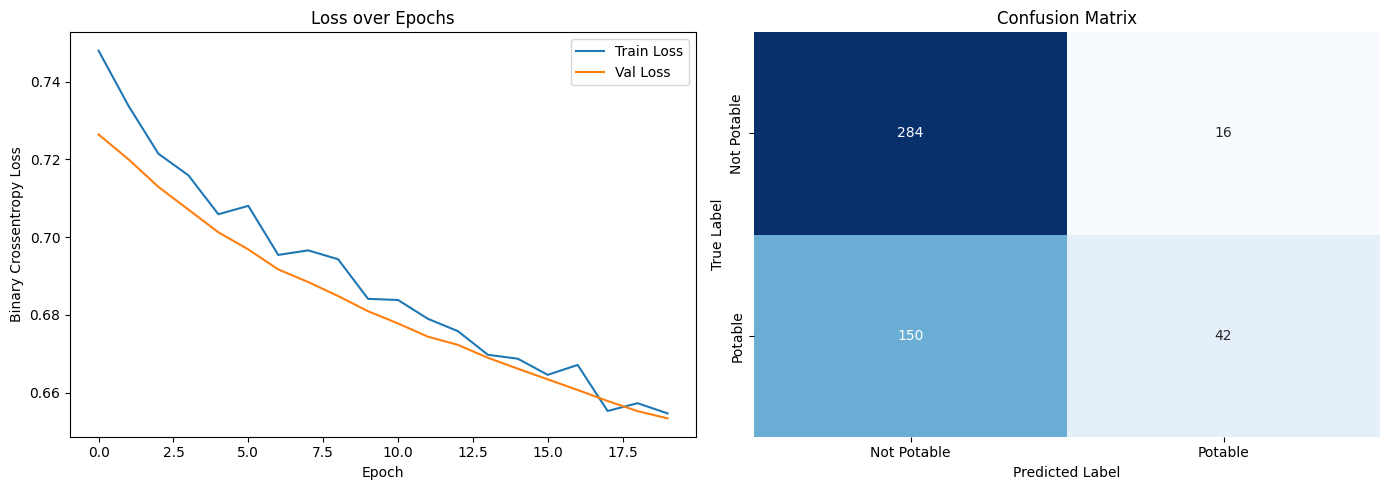

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict and binarize
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Binary Crossentropy Loss')
axes[0].legend()

# Plot 2: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'],
            ax=axes[1])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,508 (21.52 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,755 (10.77 KB)